In [1]:
RUN = 'C'

In [2]:
IMAGES_DIR = '/d2/caches/kaggle-planet/processed-images-64x64'
IMAGE_SHAPE = (64, 64, 4)

TRAIN_BATCH_SIZE = 53
TRAIN_EPOCHS = 100

VAL_SPLIT = 0.2

VAL_BATCH_SIZE = 16

TENSORBOARD_DIR = '/tensorboard/planet/' + RUN
MODEL_CHECKPOINT_DIR = '/d2/caches/kaggle-planet/models/' + RUN

In [3]:
%run 'Lib.ipynb'

In [4]:
import keras
from keras.layers import *
from keras.applications import *
from keras.models import *
from keras.callbacks import *

Using TensorFlow backend.


In [5]:
# load data
X_files = np.load('out/X_files.npy')
Y_tags_misc = np.load('out/Y_tags_misc.npy')
Y_tags_weather = np.load('out/Y_tags_weather.npy')

In [6]:
# show classes
classes_misc = np.load('out/classes_misc.npy')
for i, c in enumerate(classes_misc):
    print(i, c)

0 agriculture
1 artisinal_mine
2 bare_ground
3 blooming
4 blow_down
5 conventional_mine
6 cultivation
7 habitation
8 primary
9 road
10 selective_logging
11 slash_burn
12 water


In [7]:
# show weather classes
classes_weather = np.load('out/classes_weather.npy')
for i, c in enumerate(classes_weather):
    print(i, c)

0 clear
1 cloudy
2 haze
3 partly_cloudy
4 unknown


In [8]:
# split misc tags into separate labels

Y_tags = {}

for i, c in enumerate(classes_misc):
    tag_vals = Y_tags_misc[:,i]
    Y_tags[c] = np.zeros([len(tag_vals), 2], dtype=np.float32)
    
    for j, v in enumerate(tag_vals):
        if 1 == v: Y_tags[c][j] = [1.,0.]
        else: Y_tags[c][j] = [0.,1.]

In [9]:
Y_tags['weather'] = Y_tags_weather

In [10]:
# split data into tran/val sets
from sklearn.model_selection import train_test_split

X_files_train, X_files_val, \
Y_tags_agriculture_train, Y_tags_agriculture_val, \
Y_tags_artisinal_mine_train, Y_tags_artisinal_mine_val, \
Y_tags_bare_ground_train, Y_tags_bare_ground_val, \
Y_tags_blooming_train, Y_tags_blooming_val, \
Y_tags_blow_down_train, Y_tags_blow_down_val, \
Y_tags_conventional_mine_train, Y_tags_conventional_mine_val, \
Y_tags_cultivation_train, Y_tags_cultivation_val, \
Y_tags_habitation_train, Y_tags_habitation_val, \
Y_tags_primary_train, Y_tags_primary_val, \
Y_tags_road_train, Y_tags_road_val, \
Y_tags_selective_logging_train, Y_tags_selective_logging_val, \
Y_tags_slash_burn_train, Y_tags_slash_burn_val, \
Y_tags_water_train, Y_tags_water_val, \
Y_tags_weather_train, Y_tags_weather_val = \
train_test_split(
    X_files,
    Y_tags['agriculture'],
    Y_tags['artisinal_mine'],
    Y_tags['bare_ground'],
    Y_tags['blooming'],
    Y_tags['blow_down'],
    Y_tags['conventional_mine'],
    Y_tags['cultivation'],
    Y_tags['habitation'],
    Y_tags['primary'],
    Y_tags['road'],
    Y_tags['selective_logging'],
    Y_tags['slash_burn'],
    Y_tags['water'],
    Y_tags['weather'],
    test_size=VAL_SPLIT,
    random_state=RND)

In [11]:
# !!!

In [12]:
# calculate samples per epoch so that epoch can consist of integer number of batches
TRAIN_SAMPLES_PER_EPOCH = int(len(X_files_train) / TRAIN_BATCH_SIZE) * TRAIN_BATCH_SIZE
print ('Samples per epoch (train):', TRAIN_SAMPLES_PER_EPOCH, 'of', len(X_files_train))

Samples per epoch (train): 32383 of 32383


In [13]:
# calculate samples per epoch so that epoch can consist of integer number of batches
VAL_SAMPLES_PER_EPOCH = int(len(X_files_val) / VAL_BATCH_SIZE) * VAL_BATCH_SIZE
print ('Samples per epoch (val):', VAL_SAMPLES_PER_EPOCH, 'of', len(X_files_val))

Samples per epoch (val): 8096 of 8096


In [14]:
# define model
image_input = Input(shape=IMAGE_SHAPE, name='image_input')

x = Conv2D(32, (3, 3), padding='same')(image_input)
x = Conv2D(32, (3, 3), padding='same')(x)
x = MaxPool2D(pool_size=2)(x)

x = Conv2D(64, (3, 3), padding='same')(x)
x = Conv2D(64, (3, 3), padding='same')(x)
x = MaxPool2D(pool_size=2)(x)

x = Conv2D(128, (3, 3), padding='same')(x)
x = Conv2D(128, (3, 3), padding='same')(x)
x = MaxPool2D(pool_size=2)(x)

x = Conv2D(256, (3, 3), padding='same')(x)
x = Conv2D(256, (3, 3), padding='same')(x)
x = MaxPool2D(pool_size=2)(x)

x = Flatten()(x)
features = Dropout(rate=0.5)(x)

# 0 agriculture
# 1 artisinal_mine
# 2 bare_ground
# 3 blooming
# 4 blow_down
# 5 conventional_mine
# 6 cultivation
# 7 habitation
# 8 primary
# 9 road
# 10 selective_logging
# 11 slash_burn
# 12 water

out_tag_agriculture = Dense(
    2, activation='softmax', name='agriculture')(features)
out_tag_artisinal_mine = Dense(
    2, activation='softmax', name='artisinal_mine')(features)
out_tag_bare_ground = Dense(
    2, activation='softmax', name='bare_ground')(features)
out_tag_blooming = Dense(2, activation='softmax', name='blooming')(features)
out_tag_blow_down = Dense(2, activation='softmax', name='blow_down')(features)
out_tag_conventional_mine = Dense(
    2, activation='softmax', name='conventional_mine')(features)
out_tag_cultivation = Dense(
    2, activation='softmax', name='cultivation')(features)
out_tag_habitation = Dense(
    2, activation='softmax', name='habitation')(features)
out_tag_primary = Dense(2, activation='softmax', name='primary')(features)
out_tag_road = Dense(2, activation='softmax', name='road')(features)
out_tag_selective_logging = Dense(
    2, activation='softmax', name='selective_logging')(features)
out_tag_slash_burn = Dense(
    2, activation='softmax', name='slash_burn')(features)
out_tag_water = Dense(2, activation='softmax', name='water')(features)

out_tag_weather = Dense(
    Y_tags_weather.shape[1], activation='softmax', name='weather')(features)

model = Model(
    inputs=[image_input],
    outputs=[
        out_tag_agriculture, out_tag_artisinal_mine, out_tag_bare_ground,
        out_tag_blooming, out_tag_blow_down, out_tag_conventional_mine,
        out_tag_cultivation, out_tag_habitation, out_tag_primary, out_tag_road,
        out_tag_selective_logging, out_tag_slash_burn, out_tag_water,
        out_tag_weather
    ])

In [15]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
image_input (InputLayer)         (None, 64, 64, 4)     0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 64, 64, 32)    1184        image_input[0][0]                
____________________________________________________________________________________________________
conv2d_2 (Conv2D)                (None, 64, 64, 32)    9248        conv2d_1[0][0]                   
____________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)   (None, 32, 32, 32)    0           conv2d_2[0][0]                   
___________________________________________________________________________________________

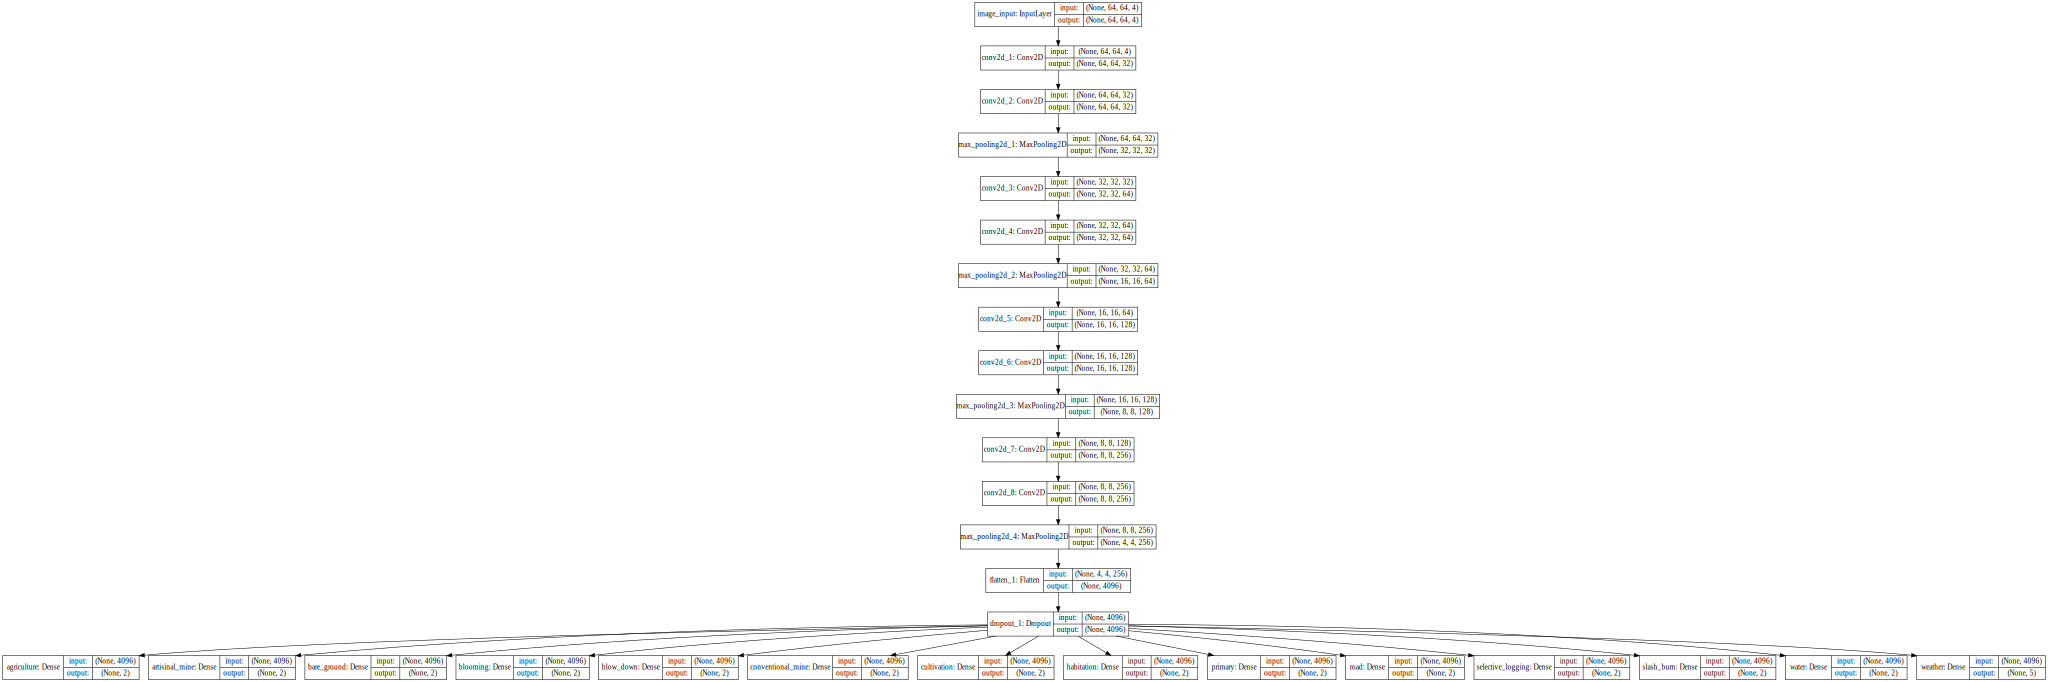

In [16]:
model_as_svg(model)

In [17]:
# 0 agriculture
# 1 artisinal_mine
# 2 bare_ground
# 3 blooming
# 4 blow_down
# 5 conventional_mine
# 6 cultivation
# 7 habitation
# 8 primary
# 9 road
# 10 selective_logging
# 11 slash_burn
# 12 water

# weather

model.compile(
    optimizer='rmsprop',
    loss={
        'agriculture': 'binary_crossentropy',
        'artisinal_mine': 'binary_crossentropy',
        'bare_ground': 'binary_crossentropy',
        'blooming': 'binary_crossentropy',
        'blow_down': 'binary_crossentropy',
        'conventional_mine': 'binary_crossentropy',
        'cultivation': 'binary_crossentropy',
        'habitation': 'binary_crossentropy',
        'primary': 'binary_crossentropy',
        'road': 'binary_crossentropy',
        'selective_logging': 'binary_crossentropy',
        'slash_burn': 'binary_crossentropy',
        'water': 'binary_crossentropy',
        'weather': 'categorical_crossentropy'        
    },
    loss_weights={
        'agriculture': 1,
        'artisinal_mine': 1,
        'bare_ground': 1,
        'blooming': 1,
        'blow_down': 1,
        'conventional_mine': 1,
        'cultivation': 1,
        'habitation': 1,
        'primary': 1,
        'road': 1,
        'selective_logging': 1,
        'slash_burn': 1,
        'water': 1,
        'weather': 1       
    })

In [18]:
# data generation

# 0 agriculture
# 1 artisinal_mine
# 2 bare_ground
# 3 blooming
# 4 blow_down
# 5 conventional_mine
# 6 cultivation
# 7 habitation
# 8 primary
# 9 road
# 10 selective_logging
# 11 slash_burn
# 12 water


def generate_batch_2(n_samples, batch_index, X_files, Y_tags_agriculture,
                     Y_tags_artisinal_mine, Y_tags_bare_ground,
                     Y_tags_blooming, Y_tags_blow_down,
                     Y_tags_conventional_mine, Y_tags_cultivation,
                     Y_tags_habitation, Y_tags_primary, Y_tags_road,
                     Y_tags_selective_logging, Y_tags_slash_burn, Y_tags_water,
                     Y_tags_weather, images_dir, image_shape):

    Xs = np.zeros((n_samples, *image_shape), dtype=np.float32)

    batches_in_X = int(len(X_files) / n_samples)
    batch_index %= batches_in_X

    X_files_batch = X_files[batch_index * n_samples:
                            batch_index * n_samples + n_samples]
    i = 0
    for f in X_files_batch:
        Xs[i] = np.fromfile(
            images_dir + '/' + f, dtype=np.float32).reshape(image_shape)
        i += 1

    if Y_tags_agriculture is None:

        return Xs

    else:

        Y_tags_agriculture_batch = Y_tags_agriculture[
            batch_index * n_samples:batch_index * n_samples + n_samples]

        Y_tags_artisinal_mine_batch = Y_tags_artisinal_mine[
            batch_index * n_samples:batch_index * n_samples + n_samples]

        Y_tags_bare_ground_batch = Y_tags_bare_ground[
            batch_index * n_samples:batch_index * n_samples + n_samples]

        Y_tags_blooming_batch = Y_tags_blooming[
            batch_index * n_samples:batch_index * n_samples + n_samples]

        Y_tags_blow_down_batch = Y_tags_blow_down[
            batch_index * n_samples:batch_index * n_samples + n_samples]

        Y_tags_conventional_mine_batch = Y_tags_conventional_mine[
            batch_index * n_samples:batch_index * n_samples + n_samples]

        Y_tags_cultivation_batch = Y_tags_cultivation[
            batch_index * n_samples:batch_index * n_samples + n_samples]

        Y_tags_habitation_batch = Y_tags_habitation[
            batch_index * n_samples:batch_index * n_samples + n_samples]

        Y_tags_primary_batch = Y_tags_primary[
            batch_index * n_samples:batch_index * n_samples + n_samples]

        Y_tags_road_batch = Y_tags_road[batch_index * n_samples:
                                        batch_index * n_samples + n_samples]

        Y_tags_selective_logging_batch = Y_tags_selective_logging[
            batch_index * n_samples:batch_index * n_samples + n_samples]

        Y_tags_slash_burn_batch = Y_tags_slash_burn[
            batch_index * n_samples:batch_index * n_samples + n_samples]

        Y_tags_water_batch = Y_tags_water[batch_index * n_samples:
                                          batch_index * n_samples + n_samples]

        Y_tags_weather_batch = Y_tags_weather[
            batch_index * n_samples:batch_index * n_samples + n_samples]

        return (Xs, {
            'agriculture': Y_tags_agriculture_batch,
            'artisinal_mine': Y_tags_artisinal_mine_batch,
            'bare_ground': Y_tags_bare_ground_batch,
            'blooming': Y_tags_blooming_batch,
            'blow_down': Y_tags_blow_down_batch,
            'conventional_mine': Y_tags_conventional_mine_batch,
            'cultivation': Y_tags_cultivation_batch,
            'habitation': Y_tags_habitation_batch,
            'primary': Y_tags_primary_batch,
            'road': Y_tags_road_batch,
            'selective_logging': Y_tags_selective_logging_batch,
            'slash_burn': Y_tags_slash_burn_batch,
            'water': Y_tags_water_batch,
            'weather': Y_tags_weather_batch
        })

In [19]:
# data generation

# 0 agriculture
# 1 artisinal_mine
# 2 bare_ground
# 3 blooming
# 4 blow_down
# 5 conventional_mine
# 6 cultivation
# 7 habitation
# 8 primary
# 9 road
# 10 selective_logging
# 11 slash_burn
# 12 water


def train_generator():
    batch_index = -1

    while True:
        batch_index += 1

        yield generate_batch_2(
            n_samples=TRAIN_BATCH_SIZE,
            batch_index=batch_index,
            X_files=X_files_train,
            Y_tags_agriculture=Y_tags_agriculture_train,
            Y_tags_artisinal_mine=Y_tags_artisinal_mine_train,
            Y_tags_bare_ground=Y_tags_bare_ground_train,
            Y_tags_blooming=Y_tags_blooming_train,
            Y_tags_blow_down=Y_tags_blow_down_train,
            Y_tags_conventional_mine=Y_tags_conventional_mine_train,
            Y_tags_cultivation=Y_tags_cultivation_train,
            Y_tags_habitation=Y_tags_habitation_train,
            Y_tags_primary=Y_tags_primary_train,
            Y_tags_road=Y_tags_road_train,
            Y_tags_selective_logging=Y_tags_selective_logging_train,
            Y_tags_slash_burn=Y_tags_slash_burn_train,
            Y_tags_water=Y_tags_water_train,
            Y_tags_weather=Y_tags_weather_train,
            images_dir=IMAGES_DIR,
            image_shape=IMAGE_SHAPE)

In [20]:
def val_generator():
    batch_index = -1

    while True:

        batch_index += 1

        yield generate_batch_2(
            n_samples=VAL_BATCH_SIZE,
            batch_index=batch_index,
            X_files=X_files_val,
            Y_tags_agriculture=Y_tags_agriculture_val,
            Y_tags_artisinal_mine=Y_tags_artisinal_mine_val,
            Y_tags_bare_ground=Y_tags_bare_ground_val,
            Y_tags_blooming=Y_tags_blooming_val,
            Y_tags_blow_down=Y_tags_blow_down_val,
            Y_tags_conventional_mine=Y_tags_conventional_mine_val,
            Y_tags_cultivation=Y_tags_cultivation_val,
            Y_tags_habitation=Y_tags_habitation_val,
            Y_tags_primary=Y_tags_primary_val,
            Y_tags_road=Y_tags_road_val,
            Y_tags_selective_logging=Y_tags_selective_logging_val,
            Y_tags_slash_burn=Y_tags_slash_burn_val,
            Y_tags_water=Y_tags_water_val,
            Y_tags_weather=Y_tags_weather_val,
            images_dir=IMAGES_DIR,
            image_shape=IMAGE_SHAPE)

In [ ]:
model.fit_generator(
    train_generator(),
    steps_per_epoch=TRAIN_SAMPLES_PER_EPOCH,
    epochs=TRAIN_EPOCHS,
    verbose=1,
    callbacks=[
        TensorBoard(log_dir=TENSORBOARD_DIR, histogram_freq=0),
        ModelCheckpoint(
                MODEL_CHECKPOINT_DIR + \
                '/e{epoch:02d}-l={loss:.5f}-vl={val_loss:.5f}.h5',
                monitor='val_loss', verbose=0, save_best_only=False,
                save_weights_only=False, mode='auto'
            ),
    ],
    validation_data=val_generator(),
    validation_steps=VAL_SAMPLES_PER_EPOCH,
    class_weight=None,
    max_q_size=10,
    workers=1,
    pickle_safe=False,
    initial_epoch=0)

Epoch 1/100
 2371/32383 [=>............................] - ETA: 889s - loss: 75.5785 - agriculture_loss: 7.4394 - artisinal_mine_loss: 6.5174 - bare_ground_loss: 6.2905 - blooming_loss: 1.2132 - blow_down_loss: 5.9792 - conventional_mine_loss: 3.7181 - cultivation_loss: 5.5897 - habitation_loss: 5.4989 - primary_loss: 6.2107 - road_loss: 6.4622 - selective_logging_loss: 4.5879 - slash_burn_loss: 3.7222 - water_loss: 4.5837 - weather_loss: 7.7653